# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('alpaca.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_request = requests.get(btc_url).json()
btc_price = btc_request['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_request = requests.get(eth_url).json()
eth_price = eth_request['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35119.20
The current value of your 5.3 ETH is $9861.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api = os.getenv("ALPACA_API_KEY")
alpaca_secret_api = os.getenv("SECRET_ALPACA_API_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api, 
    alpaca_secret_api, 
    api_version="v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-07-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                             \
                           open    high    low  close   volume trade_count   
timestamp                                                                    
2023-07-24 04:00:00+00:00  98.1  98.155  97.79  97.81  6651202       22607   

                                         SPY                          \
                                vwap    open    high      low  close   
timestamp                                                              
2023-07-24 04:00:00+00:00  97.916794  453.37  455.04  452.298  454.2   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-07-24 04:00:00+00:00  53733655      398423  453.925324

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][-1]
spy_close_price = df_portfolio['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $97.81
Current SPY closing price: $454.20


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22710.00
The current value of your 200 AGG shares is $19562.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
financial_assets_data = {"amount":[crypto, shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets_data, index =['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,44981.016
shares,42272.000


array([<Axes: ylabel='amount'>], dtype=object)

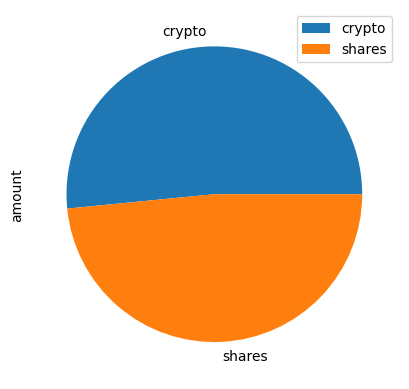

In [12]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings >= emergency_fund:
    print("Your emergency fund goal has been met!")
else:
    print("Your emergency fund goal has NOT been met")

Your emergency fund goal has been met!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-24', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_historical_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_historical_data[df_historical_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_historical_data[df_historical_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_historical_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_historical_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2018-07-24 04:00:00+00:00  105.92  106.0700  105.9001  106.05  3590304   
2018-07-25 04:00:00+00:00  106.12  106.1700  105.9500  106.06  3318801   
2018-07-26 04:00:00+00:00  106.10  106.1500  105.9500  106.00  2245020   
2018-07-27 04:00:00+00:00  106.13  106.1599  106.0400  106.08  2637432   
2018-07-30 04:00:00+00:00  105.94  106.0500  105.9100  105.97  5518246   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-07-24 04:00:00+00:00       10697  106.024395  281.79  282.56  280.63   
2018-07-25 04:00:00+00:00       10511  106.071140  281.33  284.37  281.28   
2018-07-26 04:00:00+00:00        9617  106.031610  283.20  284.11  283.09   
2018-07-27 04:00:00+00:00       10297  106.083809  283.71  283.82  280.38   
2018-07-30 04:00:00+00:00       16829  105.982889  281.51  281.69  279.36   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-07-24 04:00:00+00:00  281.55  68218935      251365  281.615133  
2018-07-25 04:00:00+00:00  284.14  78935477      265447  282.837607  
2018-07-26 04:00:00+00:00  283.30  58005495      237666  283.483326  
2018-07-27 04:00:00+00:00  281.46  78312976      326991  281.784023  
2018-07-30 04:00:00+00:00  279.90  64319758      252060  280.290726

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weights = [0.2,.8]
num_yrs = 30
portfolio_forecast = MCSimulation(
    portfolio_data = df_historical_data,
    weights= weights,
    num_simulation=100,
    num_trading_days = 252*num_yrs
)

In [17]:
# Printing the simulation input data
portfolio_forecast.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2018-07-24 04:00:00+00:00  105.92  106.0700  105.9001  106.05  3590304   
2018-07-25 04:00:00+00:00  106.12  106.1700  105.9500  106.06  3318801   
2018-07-26 04:00:00+00:00  106.10  106.1500  105.9500  106.00  2245020   
2018-07-27 04:00:00+00:00  106.13  106.1599  106.0400  106.08  2637432   
2018-07-30 04:00:00+00:00  105.94  106.0500  105.9100  105.97  5518246   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-07-24 04:00:00+00:00       10697  106.024395          NaN  281.79   
2018-07-25 04:00:00+00:00       10511  106.071140     0.000094  281.33   
2018-07-26 04:00:00+00:00        9617  106.031610    -0.000566  283.20   
2018-07-27 04:00:00+00:00       10297  106.083809     0.000755  283.71   
2018-07-30 04:00:00+00:00       16829  105.982889    -0.001037  281.51   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2018-07-24 04:00:00+00:00  282.56  280.63  281.55  68218935      251365   
2018-07-25 04:00:00+00:00  284.37  281.28  284.14  78935477      265447   
2018-07-26 04:00:00+00:00  284.11  283.09  283.30  58005495      237666   
2018-07-27 04:00:00+00:00  283.82  280.38  281.46  78312976      326991   
2018-07-30 04:00:00+00:00  281.69  279.36  279.90  64319758      252060   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-07-24 04:00:00+00:00  281.615133          NaN  
2018-07-25 04:00:00+00:00  282.837607     0.009199  
2018-07-26 04:00:00+00:00  283.483326    -0.002956  
2018-07-27 04:00:00+00:00  281.784023    -0.006495  
2018-07-30 04:00:00+00:00  280.290726    -0.005543

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
portfolio_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005853,1.017753,1.000942,0.994955,0.999471,0.990424,1.011130,0.997082,1.000134,0.993497,...,0.999861,1.001987,1.005647,1.008071,1.013442,0.982404,1.007823,1.004887,1.006971,1.005080
2,1.016524,1.026128,1.001714,0.992822,1.015792,0.984171,1.002583,1.002329,0.998157,0.990882,...,1.019436,0.995019,1.007550,1.001740,1.020554,0.977245,1.016042,1.005068,1.015343,0.993700
3,1.012160,1.030121,1.005383,0.978761,1.015827,0.980795,0.995055,1.014906,0.999944,0.988109,...,1.017958,0.991403,1.028626,1.008991,0.993685,0.984477,1.009422,0.997681,1.008403,1.004469
4,1.032531,1.056810,0.979226,0.983351,1.019751,0.978799,0.994909,1.011502,0.986612,0.997481,...,1.007391,0.991169,1.025648,1.018811,0.999085,0.991225,1.016468,0.999511,1.011414,0.998349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,36.100024,22.157622,69.807002,2.906144,17.329278,2.041439,15.836312,11.067503,27.768322,37.823971,...,1.982007,4.087934,3.640736,6.619031,3.410508,24.104291,24.775515,14.394364,21.516889,9.066805
7557,36.462068,22.349864,69.344018,2.971483,17.325353,2.027550,15.915137,11.266062,27.692097,37.681904,...,1.980670,4.123052,3.602855,6.684517,3.487980,23.850524,25.079026,14.426620,21.334297,9.117399
7558,37.117904,22.205811,67.928672,2.981807,17.305941,2.044899,15.660489,11.199959,27.308181,37.971035,...,1.988838,4.071460,3.617487,6.642157,3.484812,23.390121,24.673369,14.530489,21.413492,9.077189
7559,37.163116,21.984068,69.165508,2.946556,17.085140,2.010667,15.708652,11.334031,27.849069,37.712353,...,1.962010,4.114652,3.615452,6.632030,3.541349,23.430391,24.883800,14.513157,21.377032,9.143474


<Axes: title={'center': '100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

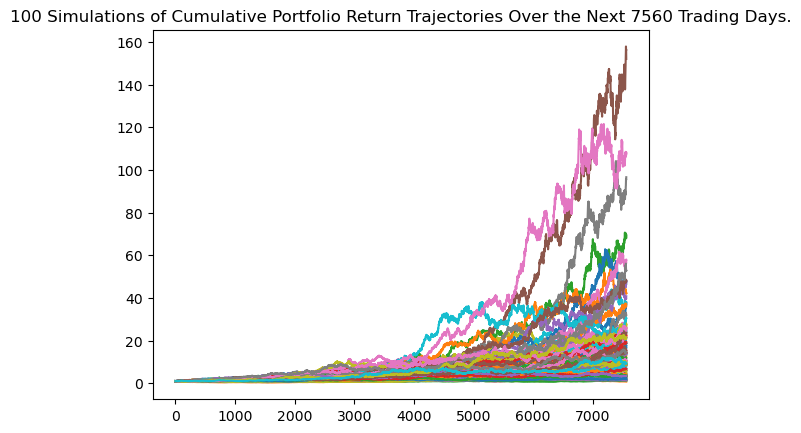

In [19]:
# Plot simulation outcomes
portfolio_forecast.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

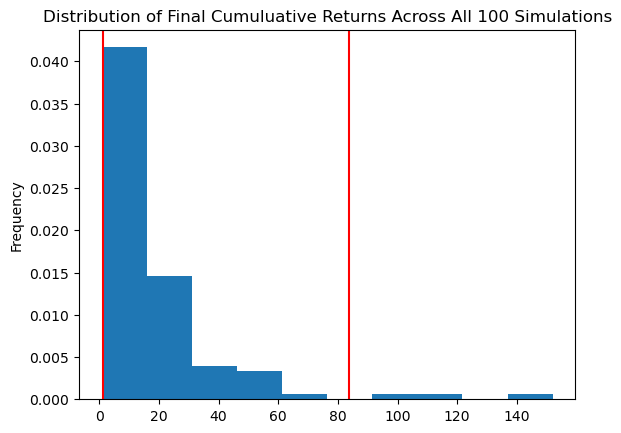

In [20]:
# Plot probability distribution and confidence intervals
portfolio_forecast.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
forecast_sum_stat = portfolio_forecast.summarize_cumulative_return()
# Print summary statistics
forecast_sum_stat

C:\Users\Artur\fintech_bootcamp\financial_planner_demo\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           100.000000
mean             18.737369
std              22.794656
min               0.784528
25%               5.449461
50%              12.432716
75%              22.219293
max             152.015059
95% CI Lower      1.339728
95% CI Upper     83.616850
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(forecast_sum_stat[8]*initial_investment,2)
ci_upper = round(forecast_sum_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26794.56 and $1672337.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(forecast_sum_stat[8]*initial_investment,2)
ci_upper = round(forecast_sum_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $40191.85 and $2508505.5


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")